In [1]:
import sympy as sp
sp.init_printing(use_unicode=True)

from scipy.optimize import minimize

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 12

from Settings import *
import Variation
import Forms

In [2]:
# Just a simple wrapper method for what is defined in Variation
def solve(Hamiltonian, formFunc):
    # Set up the form and normalize it
    form, var, bounds, volumeElement, params = formFunc()
    
    print(sp.latex(form))
    
    normForm = Variation.normalize(form, var, bounds, volumeElement)

    print(sp.latex(normForm))
    
    # Parameterize the hamiltonian using our exponential form
    energyFunc = Variation.parameterizeHamiltonian(Hamiltonian, normForm, var, bounds, volumeElement)
    
    # Minimize the energy, and plot the result
    optimalParam, minEnergy = Variation.minimizeHamiltonian(energyFunc, params, plot=True)

    print(f'Ground state energy: {minEnergy:.10} eV')

In [3]:
# Some examples of Hamiltonians
def BohrHamiltonian(psi, var):
    r, theta, phi = var
    laplacian = 1/r**2 * sp.diff(r**2 * sp.diff(psi, r), r)
    kineticTerm = -hbar**2 / (2*me) * laplacian
    potentialTerm = -e**2 / (4 * e0 * sp.pi * r) * psi
    return (kineticTerm + potentialTerm)/e

# Three dimensional quantum harmonic oscillator potential
# We'll just assume that the angular frequency w is 1 for simplicity
w = 1
def ThreeDimQHO(psi, var):
    x, y, z = var
    kineticTerm = -hbar**2 / (2*me) * (sp.diff(sp.diff(psi, x), x) + sp.diff(sp.diff(psi, y), y) + sp.diff(sp.diff(psi, z), z))
    potentialTerm = .5 * me * w**2 * (x**2 + y**2 + z**2)
    return (kineticTerm + potentialTerm)/hbar

In [24]:
# Set up an exponential function and normalize it over just the radial coordinate
radialExp, var, bounds, volumeElement, params = Forms.RadialExponential()
normRadialExp = Variation.normalize(radialExp, var, bounds, volumeElement)
print(normRadialExp)

# Set up an exponential function and normalize it over all spherical coordinates
sphericalExp, var, bounds, volumeElement, params = Forms.SphericalExponential()
normSphericalExp = Variation.normalize(sphericalExp, var, bounds, volumeElement)
print(normSphericalExp)

2*b**(3/2)*exp(-b*r)
b**(3/2)*exp(-b*r)/sqrt(pi)


e^{- b r}
\frac{b^{\frac{3}{2}} e^{- b r}}{\sqrt{\pi}}
Ground state energy: -13.60569314 eV


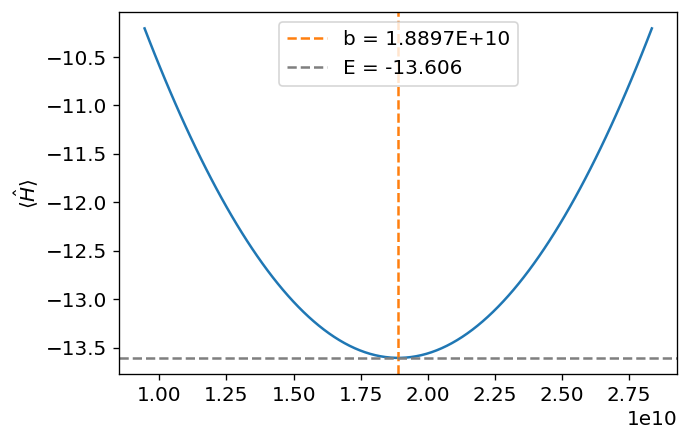

In [4]:
solve(BohrHamiltonian, Forms.SphericalExponential)
plt.savefig('images/gs_hydrogen_symbolic.png')
plt.show()

              ⎛ 2    2    2⎞
 3/4  3/4  -b⋅⎝x  + y  + z ⎠
2   ⋅b   ⋅ℯ                 
────────────────────────────
             3/4            
            π               
Ground state energy: 0.3129076676 eV
4318.996371159425


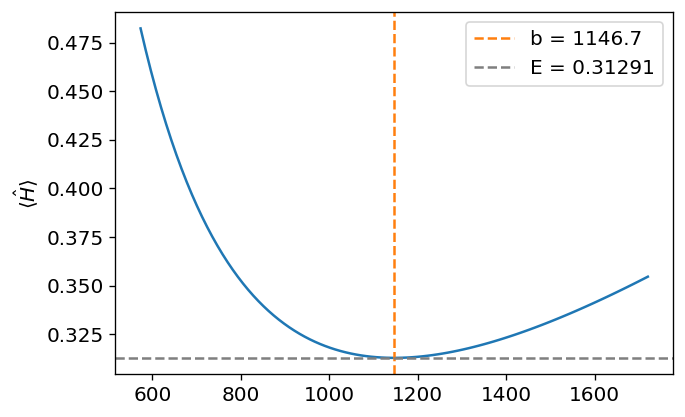

In [4]:
solve(ThreeDimQHO, Forms.CartesianGaussian)
print(me * w / (2*hbar))

In [5]:
solve(ThreeDimQHO, Forms.CartesianLorentzian)

                           9/2                   
                    0.125⋅b                      
─────────────────────────────────────────────────
 3/2 ⎛      2    2⎞ ⎛      2    2⎞ ⎛      2    2⎞
π   ⋅⎝0.25⋅b  + x ⎠⋅⎝0.25⋅b  + y ⎠⋅⎝0.25⋅b  + z ⎠


KeyboardInterrupt: 

In [3]:
x, y = sp.symbols('x y', real=True)

expr = x**2 * y**2

Variation.multivariableMinimization(expr, [x, y], [1, 1])

{x: 1.0, y: 1}
{x: 1.0, y: 1}
{x: 1.0000000149011612, y: 1}
{x: -0.010000000000000009, y: 1}
{x: -0.010000000000000009, y: 1}
{x: -0.009999985098838815, y: 1}
{x: -7.450364486807914e-09, y: 1}
{x: -7.450364486807914e-09, y: 1}
{x: 7.450796707039742e-09, y: 1}
      fun: 5.550793098628856e-17
 hess_inv: array([[0.5]])
      jac: array([4.32220232e-13])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([-7.45036449e-09])
{x: -7.450364486807914e-09, y: 1.0}
{x: -7.450364486807914e-09, y: 1.0}
{x: -7.450364486807914e-09, y: 1.0000000149011612}
      fun: 5.550793098628856e-17
 hess_inv: array([[1]])
      jac: array([1.11015862e-16])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1.])
{x: -7.450364486807914e-09, y: 1.0}
{x: -7.450364486807914e-09, y: 1.0}
{x: 7.450796707039742e-09, y: 1.0}
      fun: 5.55079309862885